## Notebook Info:

In diesem Notebook wird initial eine Daten-Exploration gemacht, als Vorstufe für die spätere Architektur der ML-Modelle in Java und Springboot.
Ebenfalls werden letzte Anpassungen an den Daten vorgenommen.
Dazu zählen aufgaben wie:
-Vorbereitung Columns für Verwendung in ML-Modellen
-Standardisierung / Normailsierung von Daten

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Bessere Plot-Darstellung direkt im Notebook
%matplotlib inline

# Pfad zu deiner bereinigten Datei (bitte anpassen falls nötig)
DATA_FILE = "data/energy_cleaned_europe.csv"

# DataFrame laden
df = pd.read_csv(DATA_FILE)

# Kurze Vorschau auf die Daten
display(df.head())

,country_or_area,year,unit,quantity,category,commodity,transaction_type,additional_transaction_info
0,Austria,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,additives and oxygenates,exports,NaN
1,Austria,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,additives and oxygenates,exports,NaN
2,Belgium,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,additives and oxygenates,exports,NaN
3,Belgium,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,additives and oxygenates,exports,NaN
4,Belgium,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,additives and oxygenates,exports,NaN


In [4]:
# Struktur der Daten prüfen
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446601 entries, 0 to 446600
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   country_or_area              446601 non-null  object 
 1   year                         446601 non-null  int64  
 2   unit                         446601 non-null  object 
 3   quantity                     446601 non-null  float64
 4   category                     446601 non-null  object 
 5   commodity                    446601 non-null  object 
 6   transaction_type             444961 non-null  object 
 7   additional_transaction_info  28806 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.3+ MB


In [5]:

# Überprüfen auf fehlende Werte
print("\nAnzahl fehlender Werte pro Spalte:")
display(df.isnull().sum())

# Übersicht über alle Länder
print("\nEinzigartige Länder:")
display(df['country_or_area'].unique())

# Übersicht über alle Energiearten (Commodities)
print("\nEinzigartige Energieträger:")
display(df['commodity'].unique())

# Übersicht über Transaktionstypen
print("\nArten von Transaktionen (Exporte, Importe, Produktion, etc.):")
display(df['transaction_type'].unique())




Anzahl fehlender Werte pro Spalte:


country_or_area                     0
year                                0
unit                                0
quantity                            0
category                            0
commodity                           0
transaction_type                 1640
additional_transaction_info    417795
dtype: int64


Einzigartige Länder:


array(['Austria', 'Belgium', 'Czech Republic', 'Finland', 'France',
       'Greece', 'Hungary', 'Italy', 'Netherlands', 'Romania', 'Serbia',
       'Slovakia', 'Ukraine', 'United Kingdom', 'Bulgaria', 'Croatia',
       'Lithuania', 'Poland', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'North Macedonia', 'Germany', 'Norway', 'Denmark',
       'Ireland', 'Moldova', 'Iceland', 'Latvia', 'Luxembourg', 'Estonia',
       'Slovenia', 'Malta', 'Belarus', 'Cyprus', 'Albania',
       'Bosnia and Herzegovina', 'Montenegro', 'Andorra', 'Liechtenstein'],
      dtype=object)


Einzigartige Energieträger:


array(['additives and oxygenates', 'animal waste', 'anthracite',
       'aviation gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black liquor', 'blast furnace gas',
       'brown coal briquettes', 'brown coal', 'lignite brown coal',
       'lignite brown coal- recoverable resources', 'charcoal',
       'coal tar', 'coke oven gas', 'coking coal',
       'conventional crude oil', 'crude petroleum',
       'direct use of geothermal heat',
       'direct use of solar thermal heat',
       'electricity generating capacity', 'electricity', 'ethane',
       'falling water', 'fuel oil', 'fuelwood', 'gas coke',
       'gas oil/ diesel oil', 'gas oil/ diesel oil ',
       'gasoline-type jet fuel', 'gasworks gas', 'coal', 'hard coal',
       'hrad coal', 'from chemical sources', 'from combustible fuels',
       'from electric boilers', 'from heat pumps', 'from other sources',
       'geothermal', 'heat', 'heat production', 'nuclear',
       'solar thermal', 'indu


Arten von Transaktionen (Exporte, Importe, Produktion, etc.):


array(['exports', 'imports', 'production', 'receipts from other sources',
       'stock changes', 'total energy supply',
       'transfers and recycled products', 'transformation',
       'transformation in oil refineries',
       'consumption by food and tobacco',
       'consumption by manufacturing, construction and non-fuel industry',
       'consumption by non-metallic minerals', 'consumption by other',
       'consumption by other manuf., const. and non-fuel min. ind.',
       'consumption in agriculture, forestry and fishing',
       'consumption not elsewhere specified (industry)',
       'final consumption', 'final energy consumption',
       'transformation in electricity, chp and heat plants',
       'transformation in electricity plants',
       'commerce and public services',
       'consumption by agriculture, forestry and fishing',
       'consumption by chemical and petrochemical',
       'consumption by construction', 'consumption by iron and steel',
       'consumptio

# Einheitliche Standardisierung auf Megajoule (MJ)

In [6]:



# Konvertierungstabellen auf Megajoule (MJ)
conversion_to_MJ = {
    "Metric tons,  thousand": 42000,   # Rohöltypische Annahme
    "Terajoules": 1000,
    "Kilowatt-hours, million": 3600,
    "Cubic metres, thousand": 38,
    "Kilowatts,  thousand": np.nan  # Leistung, keine Energie
}

# Neue Spalte "quantity_MJ" erzeugen
df['quantity_MJ'] = df.apply(
    lambda row: row['quantity'] * conversion_to_MJ.get(row['unit'], np.nan),
    axis=1
)

# Nur Zeilen behalten, wo eine Umrechnung möglich war
df = df[~df['quantity_MJ'].isna()]

print("Standardisierung abgeschlossen: Neue Spalte 'quantity_MJ' verfügbar.")


Standardisierung abgeschlossen: Neue Spalte 'quantity_MJ' verfügbar.



# 4. Fragestellung 1: 🔮 Prognose Schweiz
# "Wie entwickelt sich der Energie-Mix der Schweiz über die Jahre?"

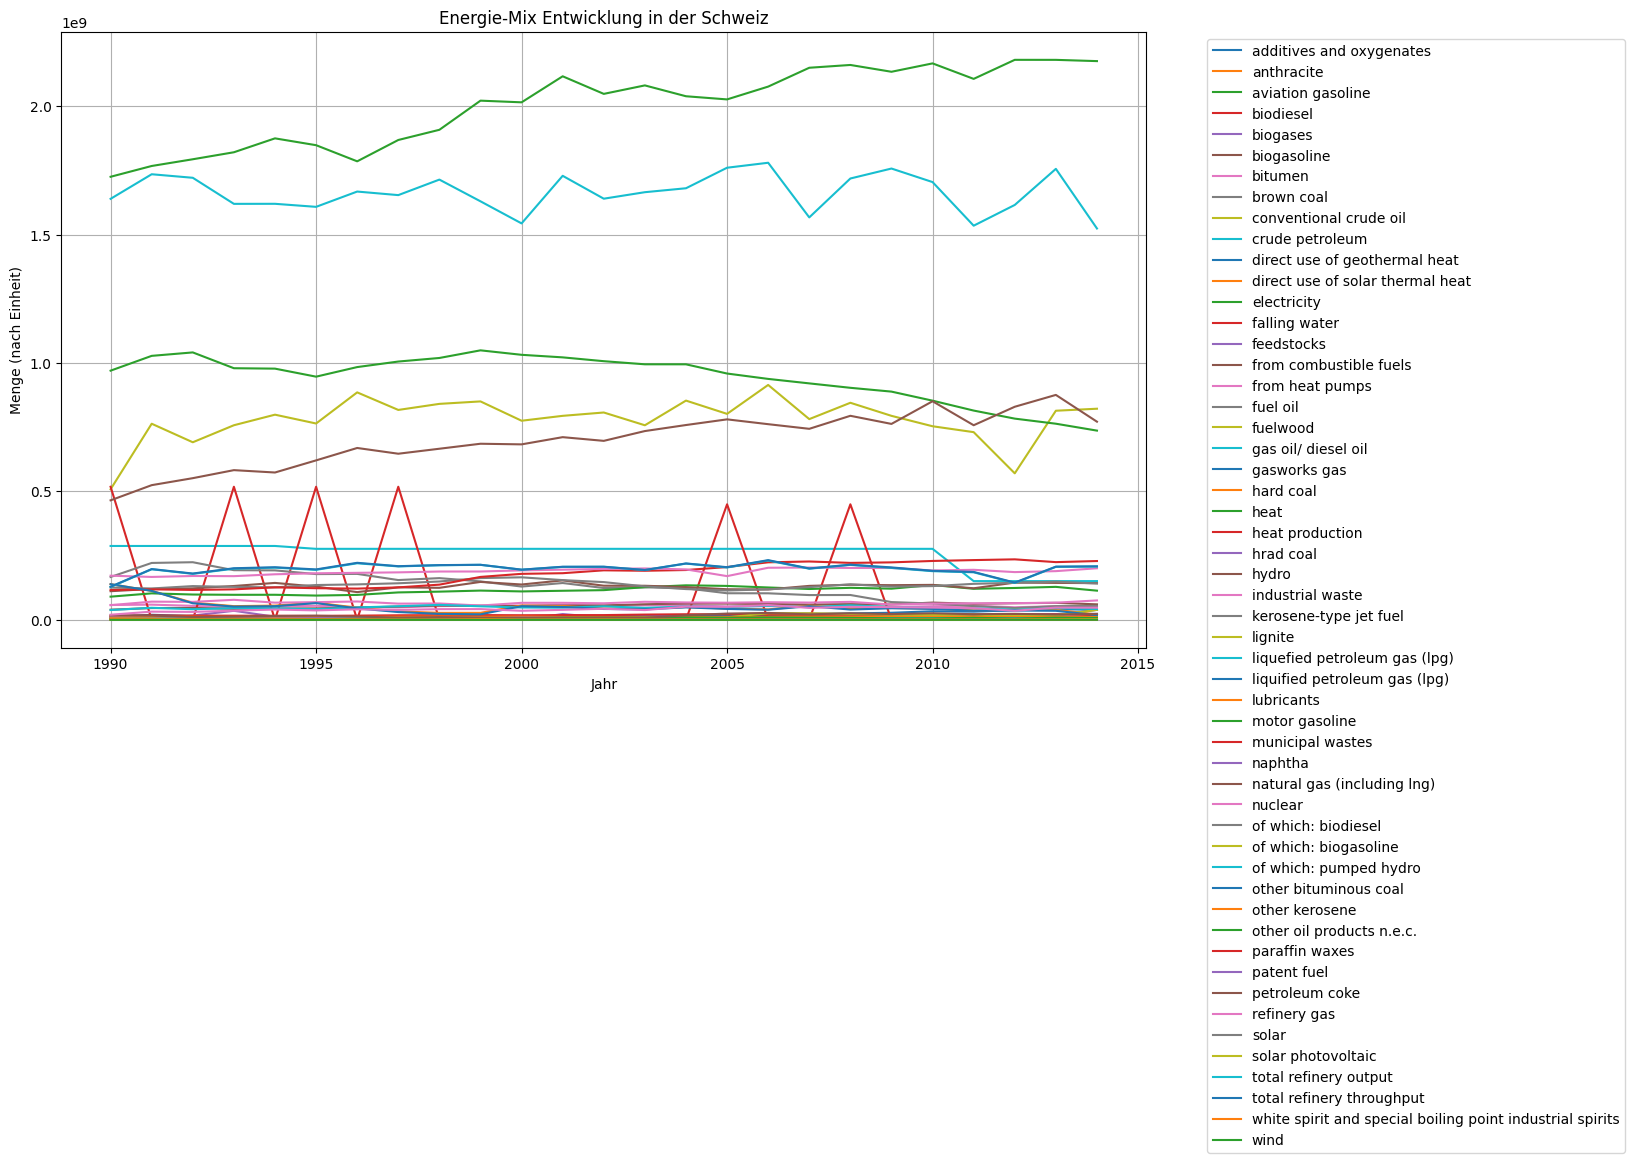

In [7]:


# Fokus auf die Schweiz
df_switzerland = df[df['country_or_area'] == 'Switzerland']

# Gruppieren nach Jahr und Energieart
pivot_switzerland = df_switzerland.pivot_table(
    index='year',
    columns='commodity',
    values='quantity_MJ',
    aggfunc='sum',
    fill_value=0
)

# Entwicklung des Energie-Mixes über die Zeit plotten
pivot_switzerland.plot(kind='line', figsize=(14, 8))
plt.title('Energie-Mix Entwicklung in der Schweiz')
plt.xlabel('Jahr')
plt.ylabel('Menge (nach Einheit)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()




# 5. Fragestellung 2: 🌍 Vergleich "Wie grün sind Länder?"
#    Länder auf Basis ihres Energie-Mixes bewerten


In [8]:
# Alle einzigartigen Energieträger (Commodities) auflisten

unique_commodities = df['commodity'].unique()

print("Liste der Energieträger (Commodities):")
for commodity in unique_commodities:
    print("-", commodity)

Liste der Energieträger (Commodities):
- additives and oxygenates
- animal waste
- anthracite
- aviation gasoline
- bagasse
- biodiesel
- biogases
- biogasoline
- bitumen
- black liquor
- blast furnace gas
- brown coal briquettes
- brown coal
- lignite brown coal
- lignite brown coal- recoverable resources
- charcoal
- coal tar
- coke oven gas
- coking coal
- conventional crude oil
- crude petroleum
- direct use of geothermal heat
- direct use of solar thermal heat
- ethane
- falling water
- fuel oil
- fuelwood
- gas coke
- gas oil/ diesel oil
- gas oil/ diesel oil 
- gasoline-type jet fuel
- gasworks gas
- electricity
- coal
- hard coal
- hrad coal
- from chemical sources
- from combustible fuels
- from electric boilers
- from heat pumps
- from other sources
- geothermal
- heat
- heat production
- nuclear
- solar thermal
- industrial waste
- kerosene-type jet fuel
- lignite
- liquefied petroleum gas (lpg)
- liquified petroleum gas (lpg)
- lubricants
- motor gasoline
- municipal waste


In [9]:
# Definieren der grünen Energieträger (basierend auf GPT-Labelling)
green_commodities = [
    'solar', 'solar photovoltaic', 'solar thermal', 
    'wind', 'hydro', 'falling water', 
    'geothermal', 'direct use of geothermal heat', 'direct use of solar thermal heat',
    'tide, wave and marine',
    'biodiesel', 'biogases', 'biogasoline',
    'vegetal waste', 'animal waste', 'municipal waste', 'municipal wastes'
]

# Neue Spalte: True wenn Commodity in der Liste der grünen Energieträger
df['is_green_energy'] = df['commodity'].str.lower().isin(green_commodities)

# 1. Energieproduktion aggregieren nach Ländern basierend auf grüner Energie

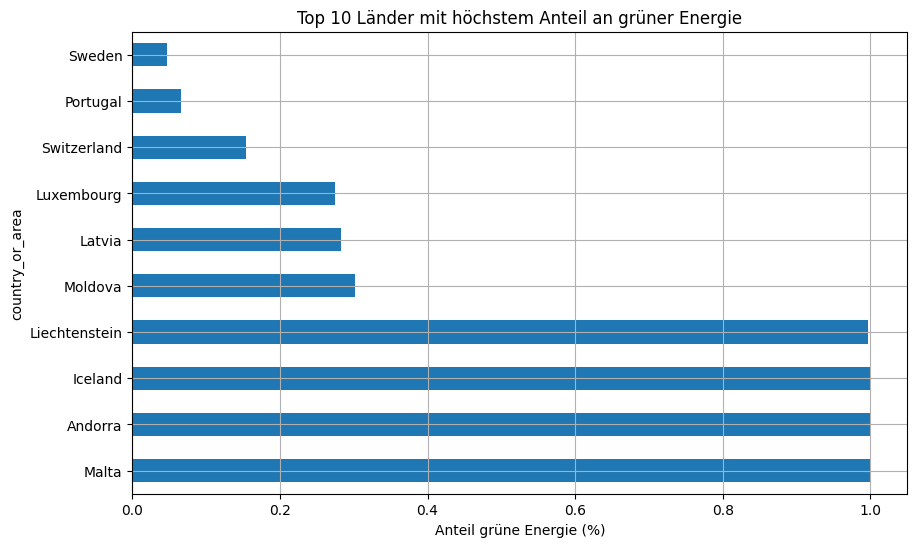

In [10]:
# Fokus auf Produktion
df_production = df[df['transaction_type'] == 'production']

# Gruppieren: Summe der produzierten Energie je Land und is_green_energy-Kategorie
pivot_production = df_production.pivot_table(
    index='country_or_area',
    columns='is_green_energy',
    values='quantity_MJ',
    aggfunc='sum',
    fill_value=0
)

# Spalten umbenennen für bessere Lesbarkeit
pivot_production = pivot_production.rename(columns={True: 'green_energy_total', False: 'non_green_energy_total'})

# Gesamte produzierte Energie (alle Energieträger zusammen)
pivot_production['total_energy'] = pivot_production['green_energy_total'] + pivot_production['non_green_energy_total']

# Anteil grüner Energie berechnen
pivot_production['green_share'] = pivot_production['green_energy_total'] / pivot_production['total_energy']

# ----------------------------------------
# 2. Ergebnisse visualisieren
# ----------------------------------------

# Länder sortieren nach Anteil grüner Energie
pivot_production_sorted = pivot_production.sort_values('green_share', ascending=False)

# Plot: Top 10 Länder mit höchstem Anteil grüner Energie
pivot_production_sorted['green_share'].head(10).plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Länder mit höchstem Anteil an grüner Energie')
plt.xlabel('Anteil grüne Energie (%)')
plt.grid(True)
plt.show()

# Data Discovery with Plotly

In [11]:
import plotly.express as px


# 1. Daten vorbereiten: Grüne Energie pro Land und Jahr


In [12]:
# Fokus auf Produktionsdaten
df_production = df[df['transaction_type'] == 'production']

# Nur grüne Energieträger auswählen
df_green = df_production[df_production['is_green_energy'] == True]

# Aggregieren: Summe der grünen Energie je Jahr und Land
df_green_year_country = df_green.groupby(['year', 'country_or_area'])['quantity'].sum().reset_index()


# 2. Interaktive Visualisierung: Dropdown pro Jahr


In [13]:
# Neu Aggregieren auf Basis der standardisierten MJ-Daten
df_green_year_country = df[df['is_green_energy'] & (df['transaction_type'] == 'production')].groupby(
    ['year', 'country_or_area']
)['quantity_MJ'].sum().reset_index()

# Plot erstellen
fig = px.bar(
    df_green_year_country,
    x='quantity_MJ',
    y='country_or_area',
    color='country_or_area',
    animation_frame='year',
    orientation='h',
    range_x=[0, df_green_year_country['quantity_MJ'].max()*1.1],
    title='Top 10 Länder mit höchster Produktion von grüner Energie pro Jahr',
    labels={'quantity_MJ': 'Produzierte Menge (in MJ)', 'country_or_area': 'Land'}
)

# Sortierung innerhalb jedes Frames auf Top 10
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    height=700,
    showlegend=False
)

fig.show()

## Dataframe exportieren für weitere Verwendung in Java-Applikation

In [14]:
# Neuen Dateipfad definieren (anpassen falls nötig)
output_file = "data/energy_cleaned_europe_final.csv"

# Das aktuelle DataFrame als CSV speichern
df.to_csv(output_file, index=False)

print(f"Datei erfolgreich gespeichert: {output_file}")

Datei erfolgreich gespeichert: data/energy_cleaned_europe_final.csv


# Einheitliche Standardisierung auf Gigajoule (GJ)


In [17]:
# Konvertierungstabellen auf Gigajoule (GJ)
conversion_to_GJ = {
    "Metric tons,  thousand": 42,   # Beispiel für Öl
    "Terajoules": 1,
    "Kilowatt-hours, million": 3.6,
    "Cubic metres, thousand": 0.038,
    "Kilowatts,  thousand": np.nan  # Leistung, keine Energie
}

# Neue Spalte "quantity_GJ" erzeugen
df['quantity_GJ'] = df.apply(
    lambda row: row['quantity'] * conversion_to_GJ.get(row['unit'], np.nan),
    axis=1
)

# Nur gültige Zeilen behalten
df = df[~df['quantity_GJ'].isna()]

print("Standardisierung abgeschlossen: Neue Spalte 'quantity_GJ' verfügbar.")

# ----------------------------------------
# Exportieren des finalen DataFrames in eine CSV-Datei
# ----------------------------------------

# Pfad und Dateiname (anpassen falls nötig)
output_file = "data/energy_cleaned_europe_final_gj.csv"

# Speichern als CSV
df.to_csv(output_file, index=False)

print(f"Datei erfolgreich gespeichert: {output_file}")

Standardisierung abgeschlossen: Neue Spalte 'quantity_GJ' verfügbar.
Datei erfolgreich gespeichert: data/energy_cleaned_europe_final_gj.csv
